In [3]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
# from skimage.metrics import structural_similarity as ssim
from ipynb_util import *
from lightprop2d import Beam2D, random_round_hole_phase, um, round_hole, gaussian_beam, plane_wave

In [30]:
modes, betas, ops = load_fiber_data('mmf_SI_9_*.npz')

In [5]:
bounds = [-4.5 * 3.5 / 2, 4.5 * 3.5 / 2]
modes_indices = np.arange(5)

In [6]:
for c in modes:
    print(SSIM(cp.abs(modes[c][1]).get(), cp.abs(modes[0][1]).get()))

1.0
0.5351102561608356
0.5351257957640362
0.5351412296973526
0.5639628090881492
0.5351631572575498
0.5351239875565594
0.5351249494449121


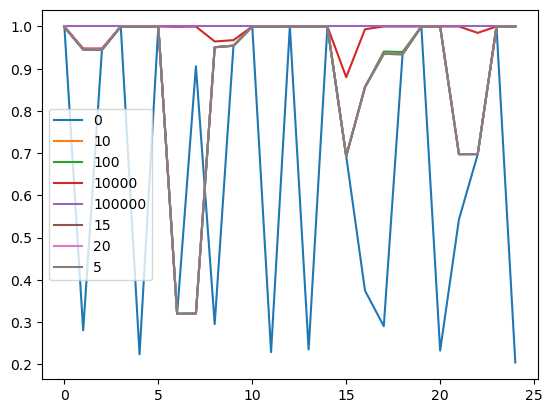

In [7]:
diff = {}
for k in modes:
    diff[k] = []
    for i in range(len(modes[0])):
        diff[k].append(SSIM(cp.abs(modes[100000][i]).get() ** 2, cp.abs(modes[k][i]).get() ** 2))
    plt.plot(diff[k], label=k)
plt.legend()

In [56]:
diff = []
base = 5
maxargs = {c: [] for c in modes if c != base}
maxs = {c: [] for c in modes if c != base}
for m in modes[base]:
    diff.append([])
    for c in modes:
        if c == base:
            continue
        for m2 in modes[c]:
            diff[-1].append(SSIM(cp.abs(m) ** 2, cp.abs(m2) ** 2).get())
        maxargs[c].append(np.argmax(diff[-1]))
        maxs[c].append(np.max(diff[-1]))

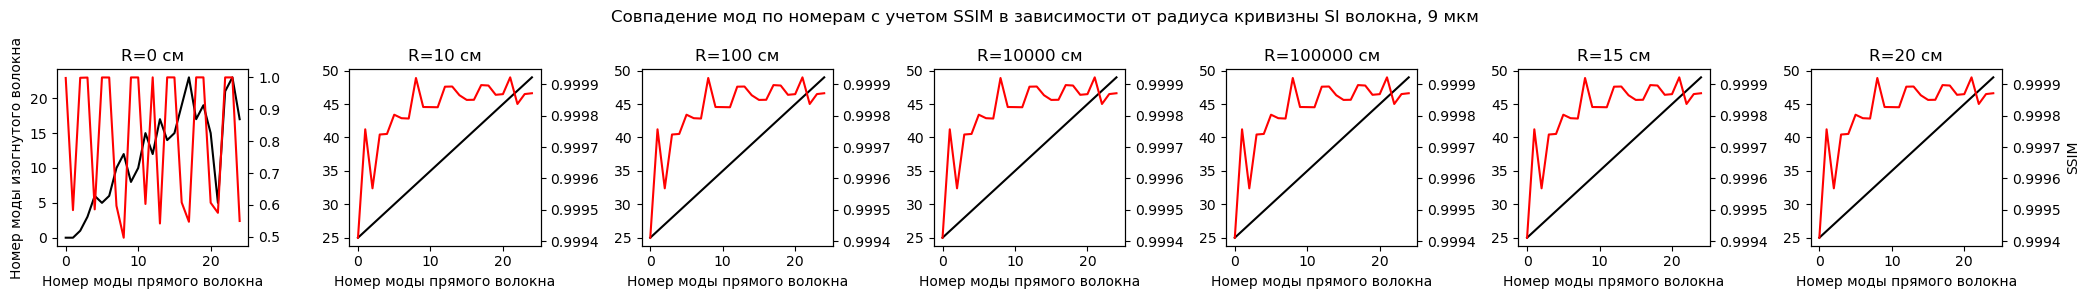

In [60]:
fig, axes = plt.subplots(1, len(maxs.keys()), figsize=(len(maxs.keys()) * 3, 3))
for i, c in enumerate(maxargs):
    axes[i].plot(maxargs[c], color='black')
    ax = axes[i].twinx()
    ax.plot(maxs[c], color='r')
    axes[i].set_xlabel("Номер моды прямого волокна")
    axes[i].set_title(f"R={c} см")
axes[0].set_ylabel("Номер моды изогнутого волокна")
ax.set_ylabel("SSIM")
fig.suptitle("Совпадение мод по номерам с учетом SSIM в зависимости от радиуса кривизны SI волокна, 9 мкм")
plt.tight_layout()


In [10]:
wl = 0.632  # wavelength in microns
radius = 31.25  # in microns
n1 = 1.45
N = 100
# calculate the field on an area larger than the diameter of the fiber
area_size = 3.5 * radius
npoints = 2**8  # resolution of the window
fiber_len = 100 / um

ref = Beam2D(area_size, npoints, wl,
             init_field_gen=plane_wave,
             init_gen_args=(), use_gpu=True,
             complex_bits=64)

plane_data = {}
for c in modes:
    plane_data[c] = calc_inout(modes[c], ops[c], ref, fiber_len)

c:\Users\vonGostev\miniconda3\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [11]:
for c in plane_data:
    i, _, _, o, _, _ = plane_data[c]
    print(SSIM(cp.abs(i) , cp.abs(o)))

-8.60135500684272e-06
-4.90125018188962e-06
-3.875642094078097e-06
-3.826179322614786e-06
-3.826169491169085e-06
-5.5460660491522585e-06
-4.937146126220843e-06
-6.40469605697051e-06


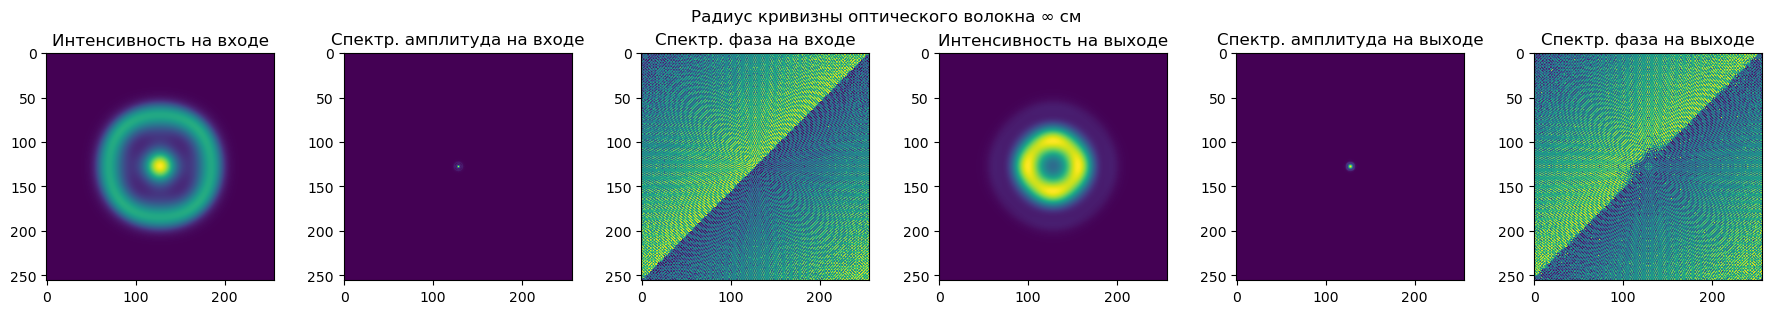

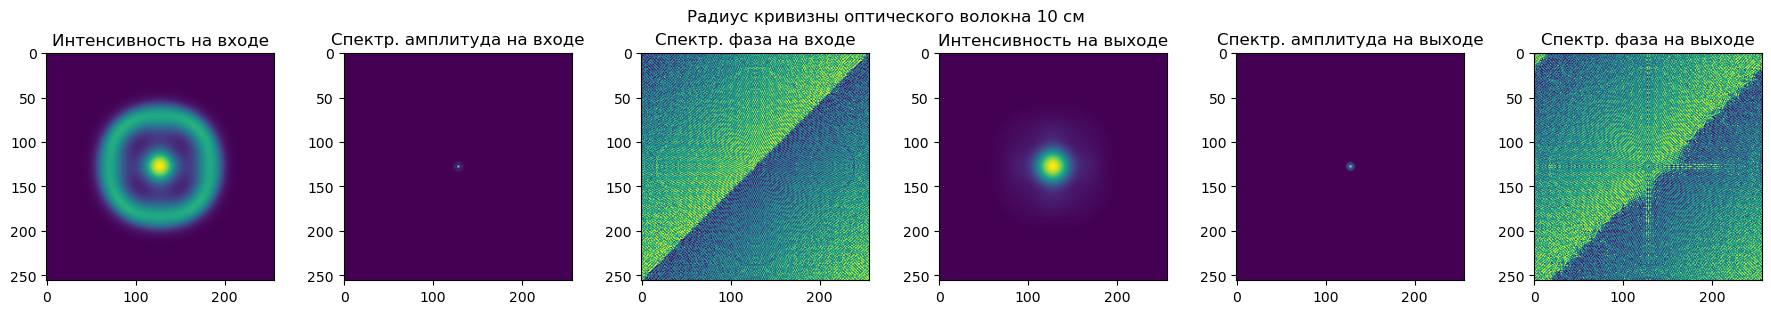

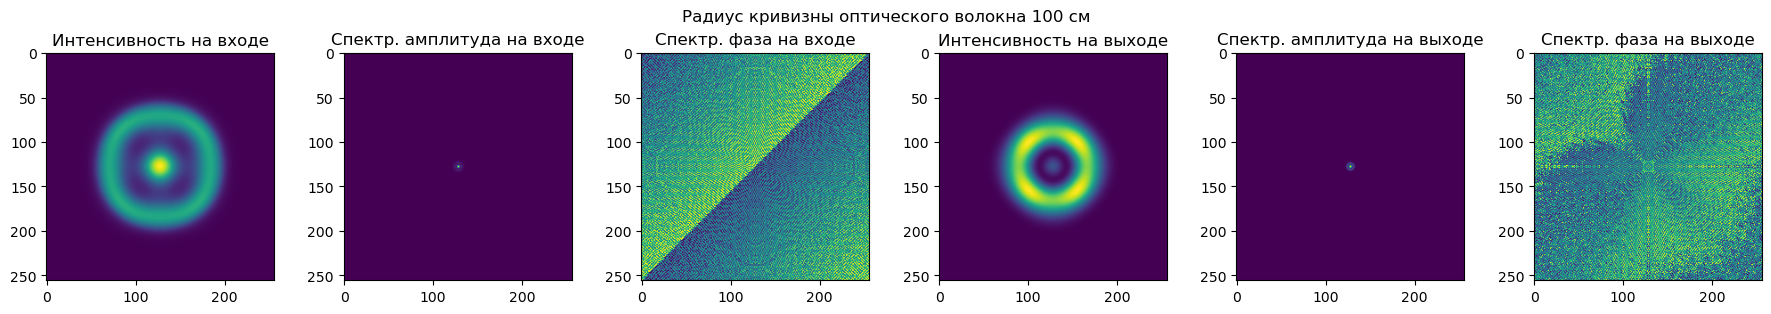

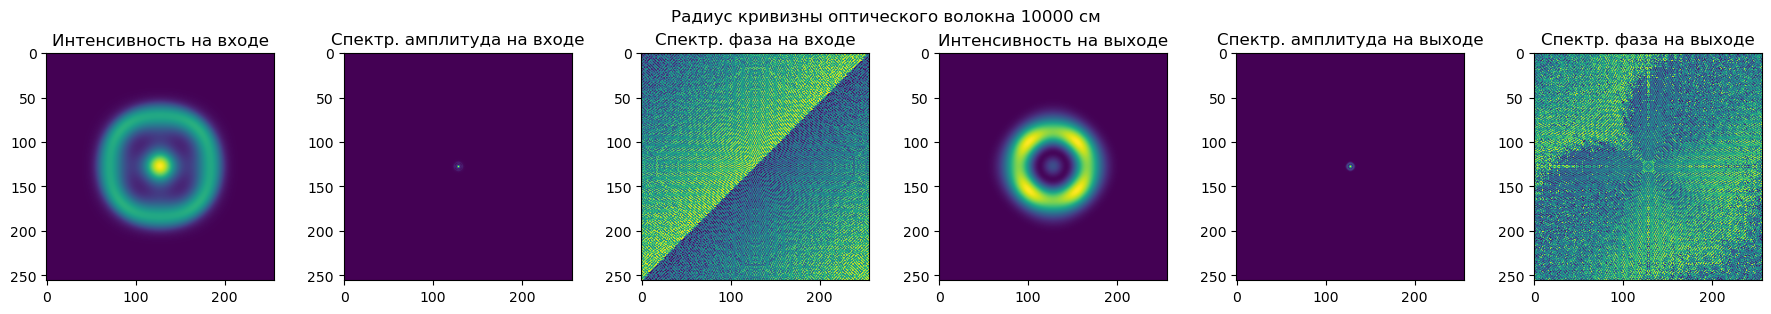

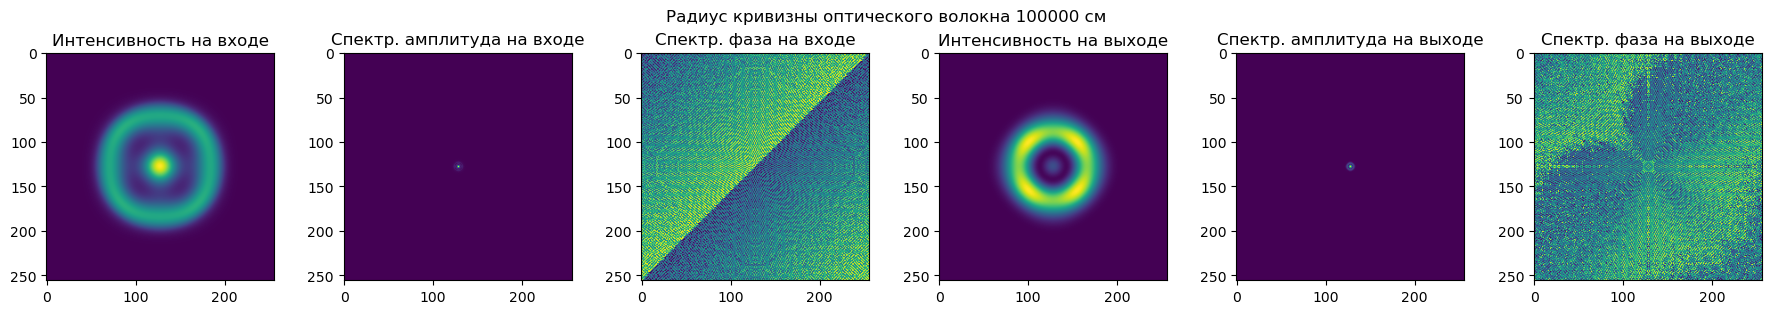

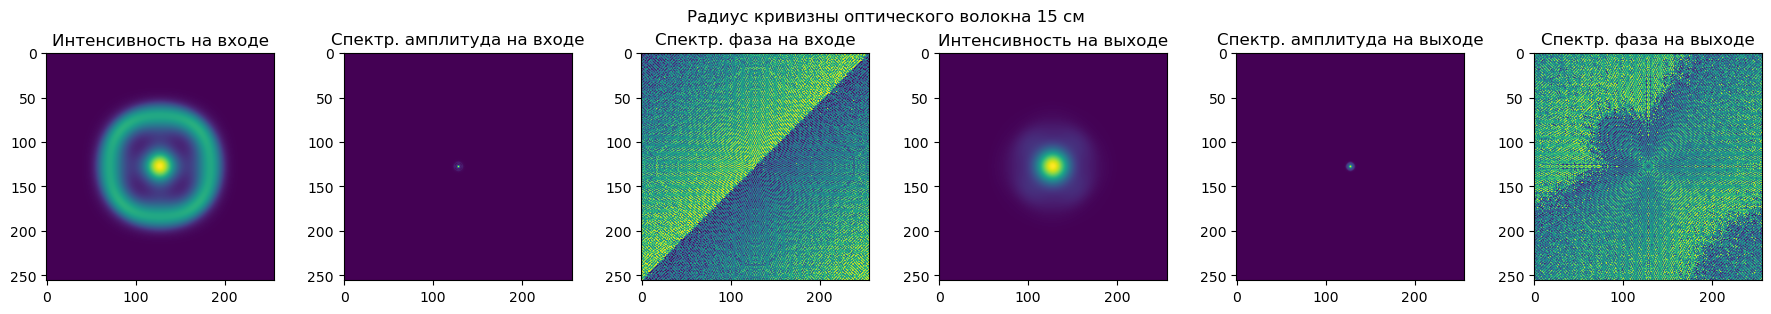

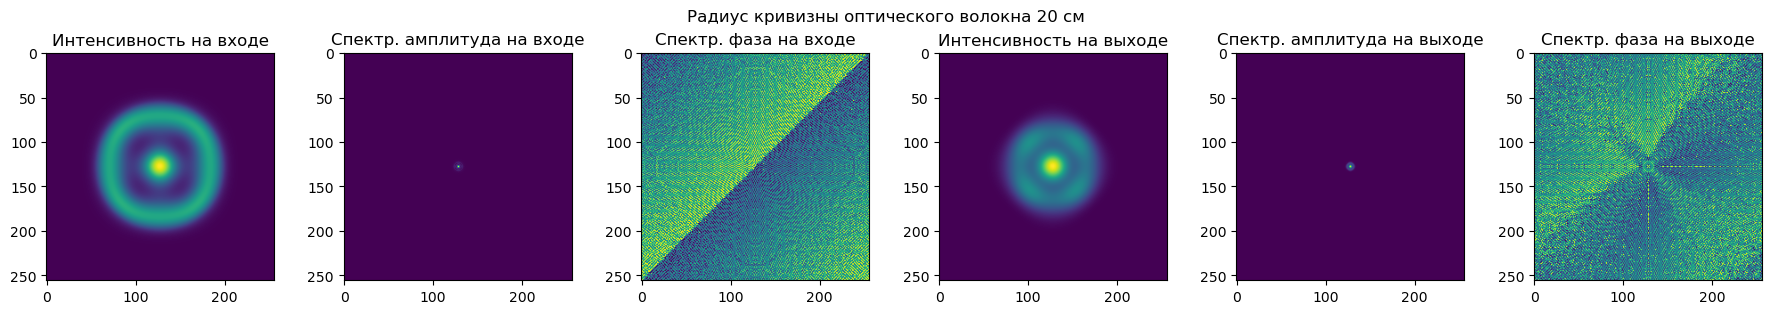

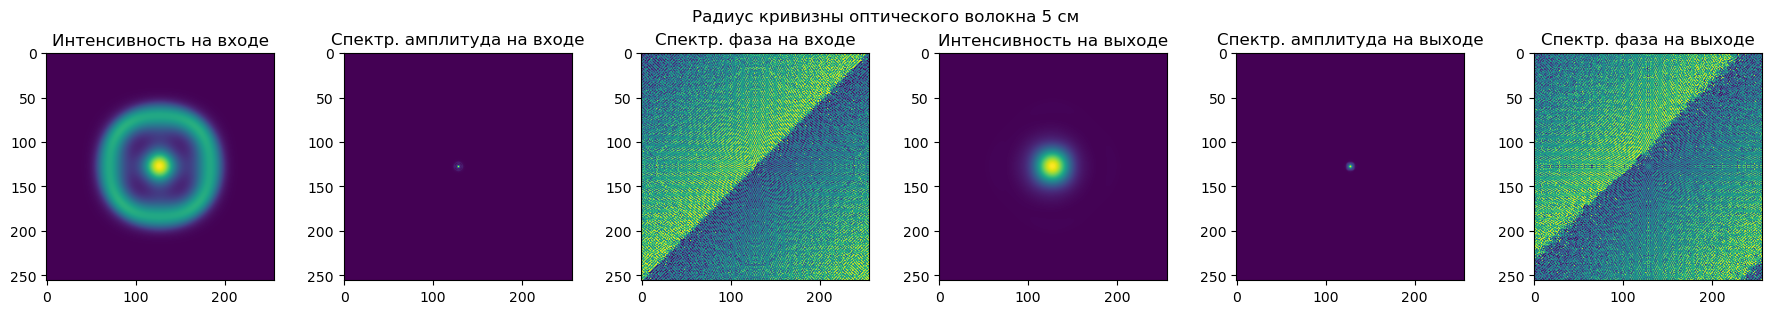

In [12]:
for c in plane_data:
    plot_inout_data(plane_data[c], c)

In [13]:
wl = 0.632  # wavelength in microns
radius = 31.25  # in microns
n1 = 1.45
N = 100
# calculate the field on an area larger than the diameter of the fiber
area_size = 3.5 * radius
npoints = 2**8  # resolution of the window
fiber_len = 100 / um

ref = Beam2D(area_size, npoints, wl,
             init_field_gen=gaussian_beam,
             init_gen_args=(1, 2.5), use_gpu=True,
             complex_bits=64)

gaussian_data = {}
for c in modes:
    gaussian_data[c] = calc_inout(modes[c], ops[c], ref, fiber_len)

In [14]:
for c in gaussian_data:
    i, _, _, o, _, _ = gaussian_data[c]
    print(SSIM(cp.abs(i) ** 2, cp.abs(o) ** 2))

-0.0003229741322541167
-4.791175693173271e-06
-7.608371588414501e-05
-7.591983649715818e-05
-7.639481582002165e-05
-6.1679192883940714e-06
-3.0389575763686822e-05
-3.7740461266116637e-06


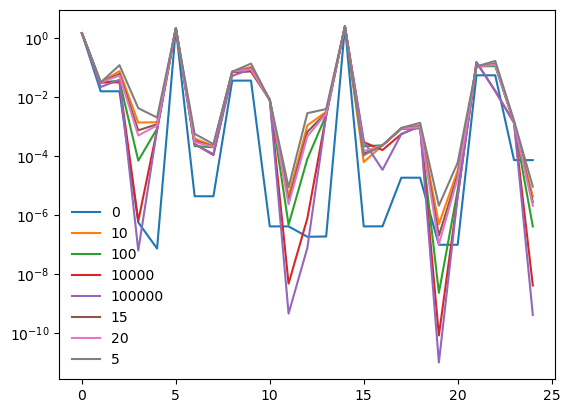

In [15]:
for c in gaussian_data:
    a = np.abs(gaussian_data[c][-2].get())
    plt.semilogy(a, label=c)
plt.legend(frameon=False)
plt.show()

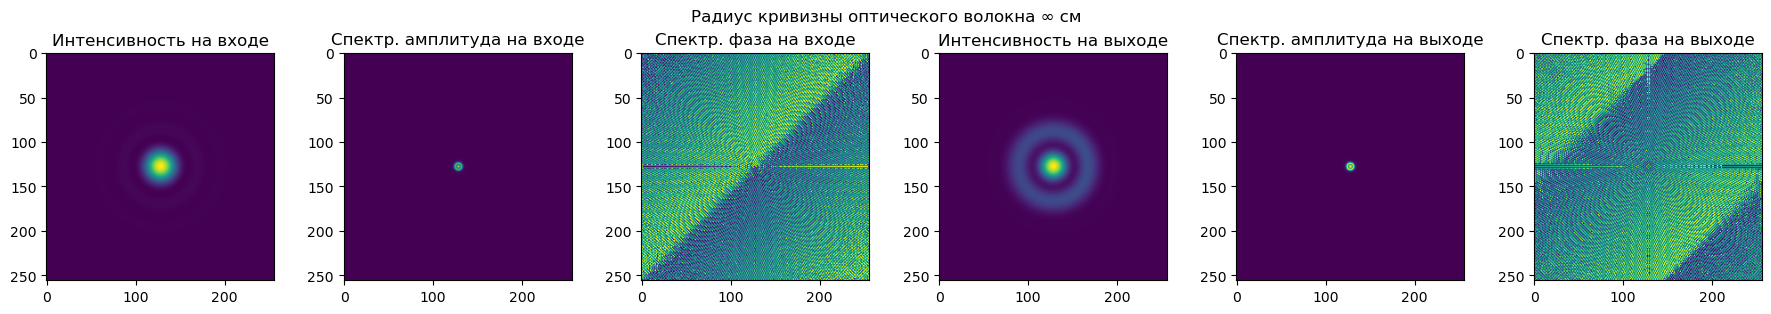

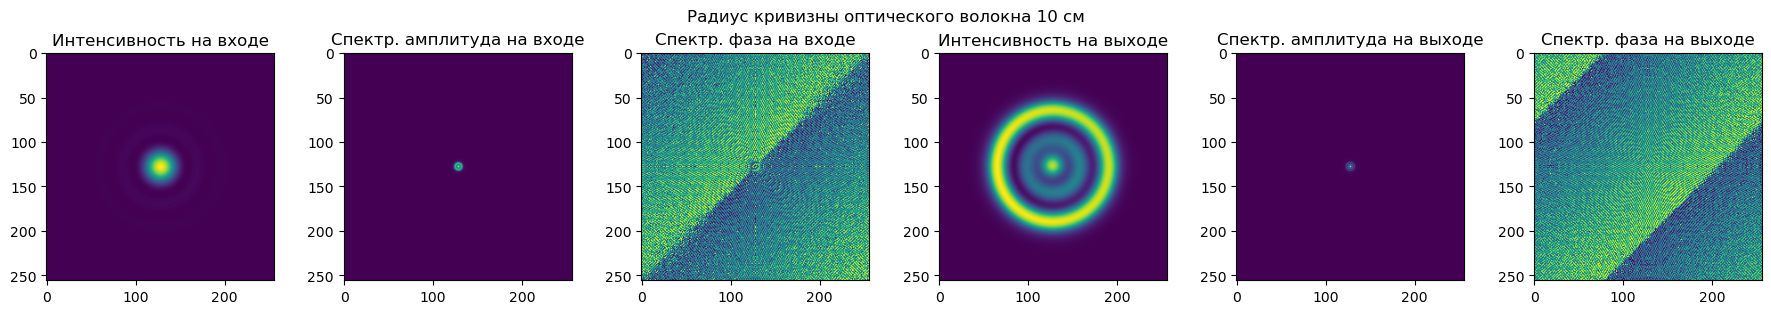

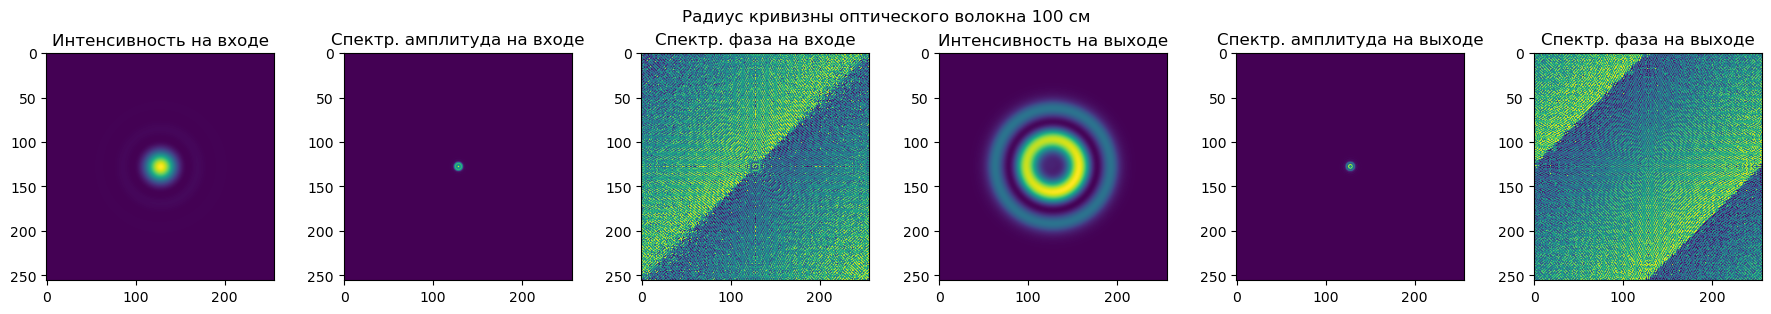

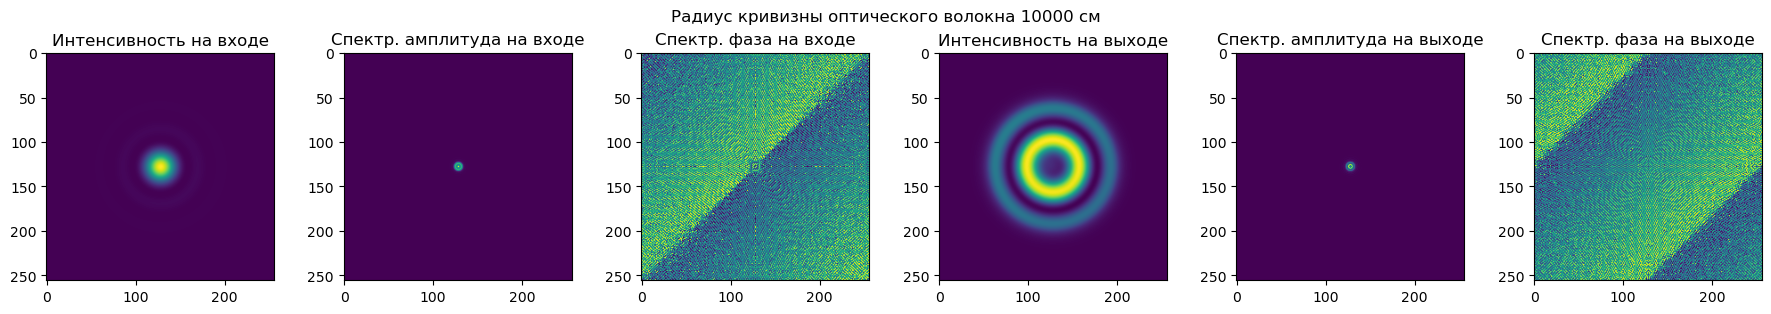

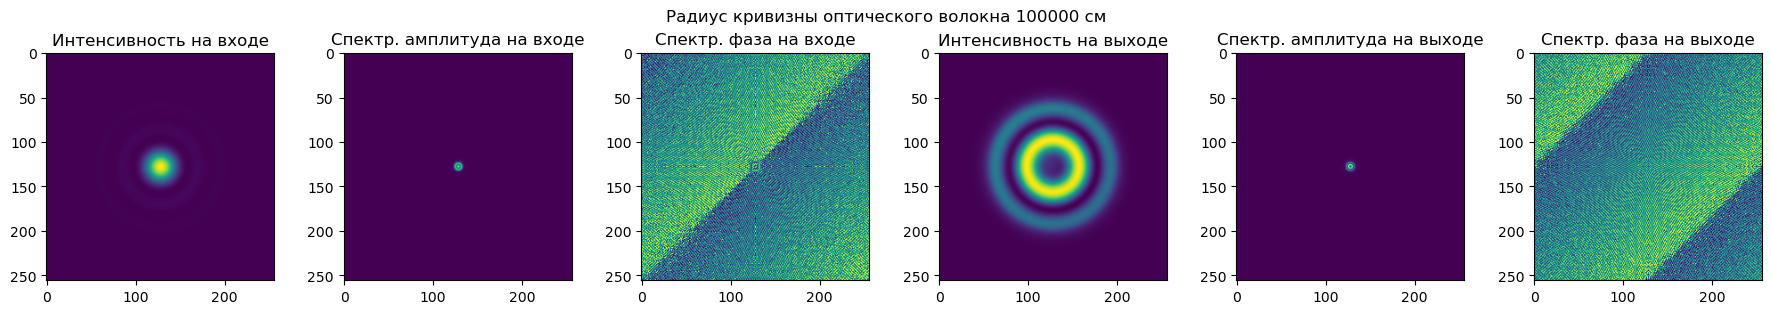

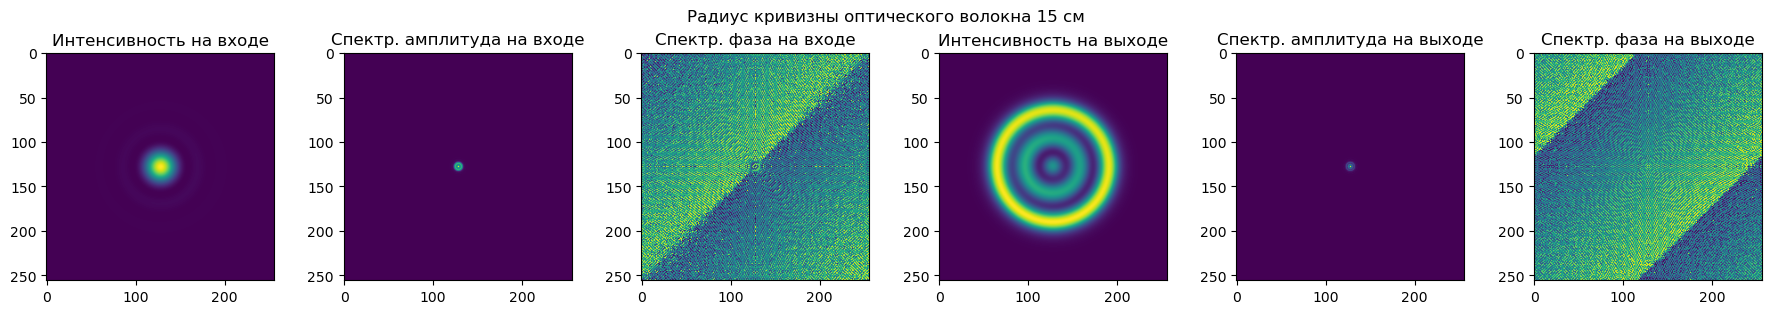

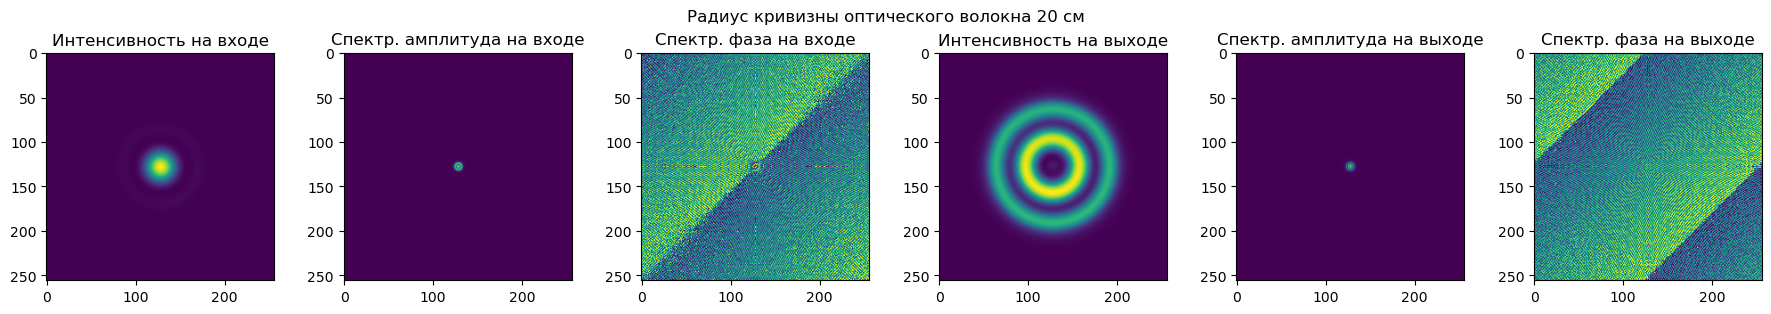

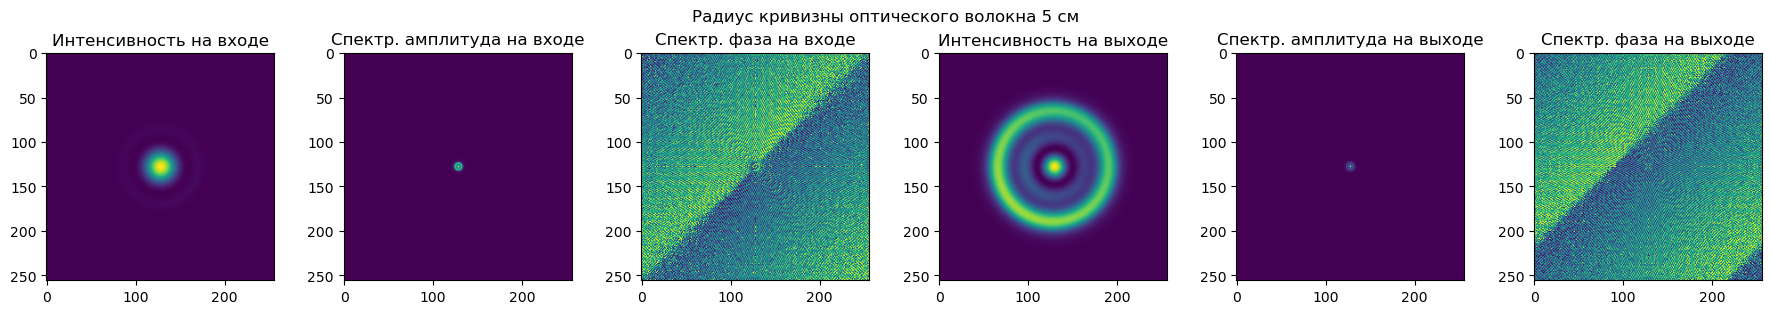

In [16]:
for c in gaussian_data:
    plot_inout_data(gaussian_data[c], c)